In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('pylidc_features.csv')

X = data.drop(['malignancy', 'nodule_id'], axis=1)
y = data['malignancy']

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#model = Sequential()
#model.add(Dense(256, input_dim=X_train.shape[1], activation='elu'))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='elu'))
#model.add(Dense(64, activation='elu'))
#model.add(Dense(32, activation='elu'))
#model.add(Dense(16, activation='elu'))
#model.add(Dense(y_train.shape[1], activation='softmax'))
model = Sequential()
model.add(Dense(256, input_dim=14, activation='relu'))  # Primeira camada oculta
#model.add(Dense(128, activation='elu'))  # Segunda camada oculta
#model.add(Dense(64, activation='relu'))  # Terceira camada oculta
model.add(Dense(y_train.shape[1], activation='softmax')) 

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2591 - loss: 17.2620 - val_accuracy: 0.3569 - val_loss: 8.1378
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3740 - loss: 8.1047 - val_accuracy: 0.4943 - val_loss: 9.4841
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3889 - loss: 10.3255 - val_accuracy: 0.4504 - val_loss: 7.6334
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4248 - loss: 8.1658 - val_accuracy: 0.4466 - val_loss: 7.3303
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.4057 - loss: 7.6897 - val_accuracy: 0.3321 - val_loss: 4.7280
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4101 - loss: 7.7605 - val_accuracy: 0.4485 - val_loss: 3.8654
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4253 - loss: 8.2392 - val_accuracy: 0.3836 - val_loss: 3.7176
Epoch 8/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4667 - loss: 7.2538 - val_accuracy

In [57]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5084 - loss: 1.4169 
Loss: 1.2777025699615479, Accuracy: 0.5248091816902161


In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

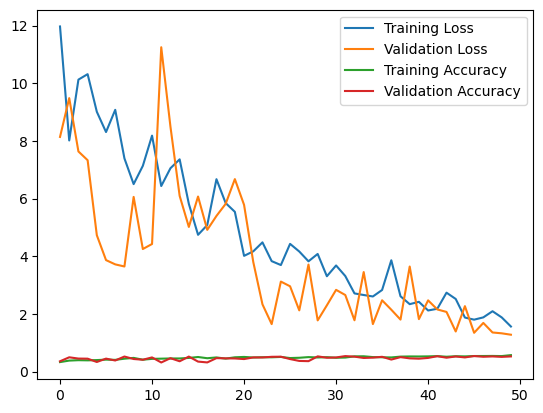

In [59]:
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.show()